In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'cleaned_h1b.csv'
h1b_data = pd.read_csv(file_path)

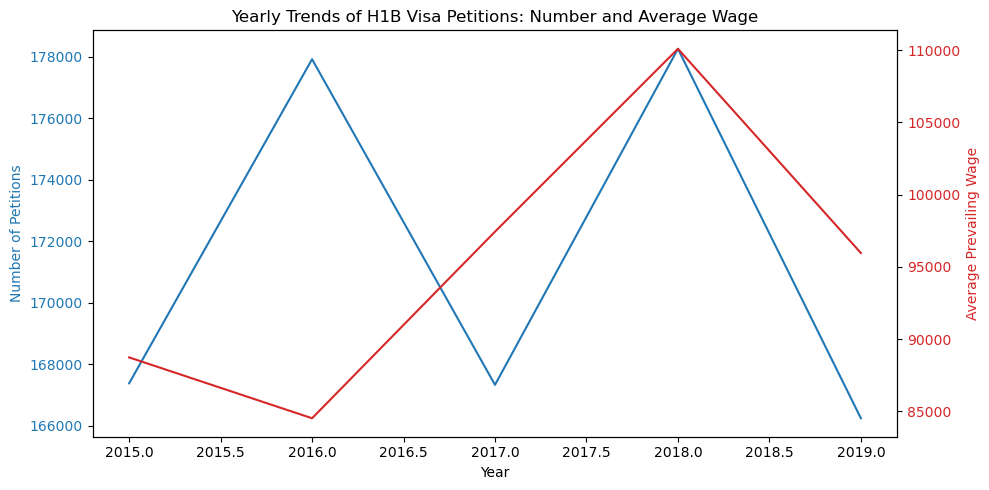

In [11]:
yearly_data = h1b_data.groupby('YEAR').agg({'CASE_NUMBER': 'count', 'PREVAILING_WAGE': 'mean'})

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Petitions', color=color)
ax1.plot(yearly_data.index, yearly_data['CASE_NUMBER'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Prevailing Wage', color=color)
ax2.plot(yearly_data.index, yearly_data['PREVAILING_WAGE'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Trends of H1B Visa Petitions: Number and Average Wage')
fig.tight_layout()
plt.show()

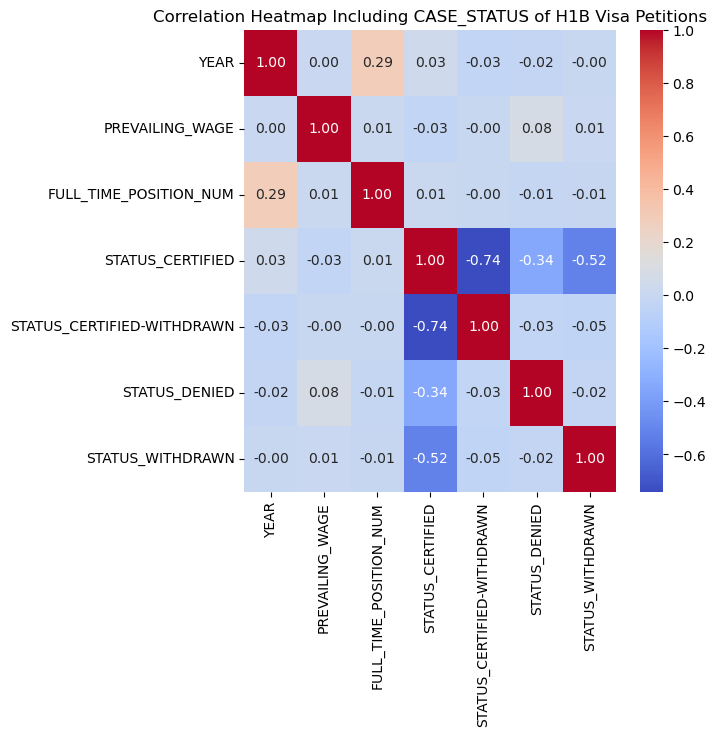

In [12]:
import seaborn as sns

#converting full time position categorical data into numerical 
h1b_data['FULL_TIME_POSITION_NUM'] = h1b_data['FULL_TIME_POSITION'].apply(lambda x: 1 if x == 'Y' else 0)

#using get_dummies() method to create dummy matrix for Case satatus as it is categorical
case_status_encoded = pd.get_dummies(h1b_data['CASE_STATUS'], prefix='STATUS')

encoded_data = h1b_data.join(case_status_encoded)

columns_for_correlation = ['YEAR', 'PREVAILING_WAGE', 'FULL_TIME_POSITION_NUM'] + list(case_status_encoded.columns)
correlation_data = encoded_data[columns_for_correlation]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Including CASE_STATUS of H1B Visa Petitions')
plt.show()
